## Imersão de Dados - Alura

### Apresentação

#### Autores
1.   [Grupo Alura](https://www.alura.com.br) - A maior plataforma brasileira de cursos de tecnologia.
2.   [Lucas Araújo](https://www.linkedin.com/in/lucasaraujo0255/)- Entusiasta de Data Science e cursando Ciências da Computação

### Resumo

Este documento tem o objetivo apresentar um estudo de Data Science oferecido na semana de Imersão de Dados da Alura (https://www.alura.com.br): uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning utilizando o Python e as principais bibliotecas na área de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no decorrer do documento.

Os dados foram disponibilizados pela Alura e contém cerca de 128 mil registros de inscrições de alunos que realizaram as provas do ENEM 2019.

Clique [Aqui](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true.) para acessar os dados

#### Desafios - Dia 01:

**1**: Proporção dos inscritos por idade.

**2**: Descobrir de quais estados são os inscritos com 13 anos.

**3**: Adicionar título no gráfico.

**4**: Plotar os histogramas das idades do treineiro e não treineiros.

**5**: Comparar as distribuições das provas em inglês e espanhol.

**6**: Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## [Aula 01](https://www.alura.com.br/imersao-dados/aula01-educacao-no-brasil) - Dados da Educação

In [2]:
df = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
df.shape

(127380, 136)

In [4]:
# Quantidade de pessoas por estado
df['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [5]:
# Quantidade de pessoas por idade
df['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [6]:
# Quantidade de pessoas por idade ordenado
df['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

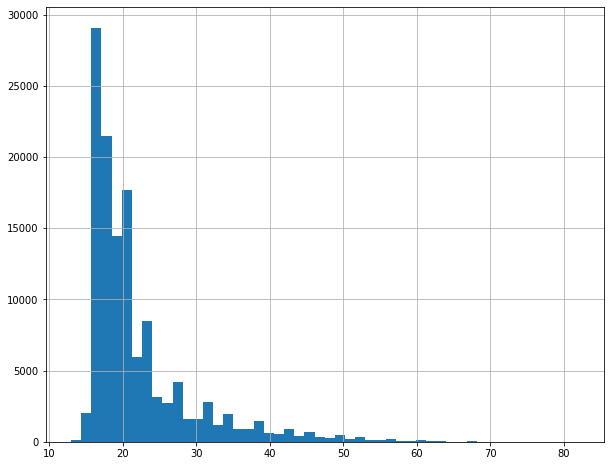

In [7]:
# Histograma de pessoas por idade
df["NU_IDADE"].hist(bins = 50, figsize = (10, 8))

In [8]:
# Pessoas que são treineiras(As notas não contam) de acordo com a idade
df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

In [9]:
# Pessoas que não são Treineiras e possuem idade menor que 18 anos
df.query("IN_TREINEIRO == 0 & NU_IDADE < 18")["NU_IDADE"].value_counts()

17    16355
16      688
15       82
14       77
13        4
Name: NU_IDADE, dtype: int64

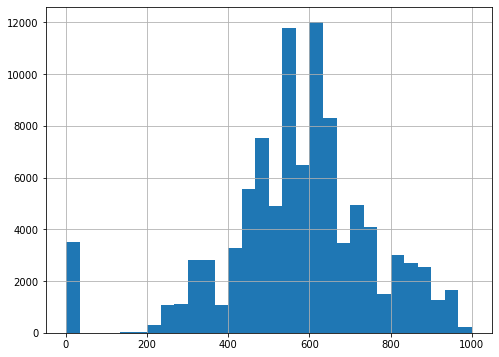

In [10]:
df['NU_NOTA_REDACAO'].hist(bins = 30, figsize = (8, 6))

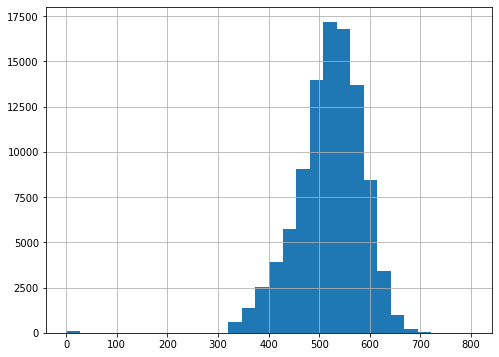

In [11]:
df['NU_NOTA_LC'].hist(bins = 30, figsize = (8, 6))

In [12]:
# Média
df['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [13]:
# Desvio padrão
df['NU_NOTA_REDACAO'].std()

188.07645455749753

In [14]:
# Descrição de todas as notas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

df[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [15]:
# 90%
df['NU_NOTA_LC'].quantile(0.1)

434.5

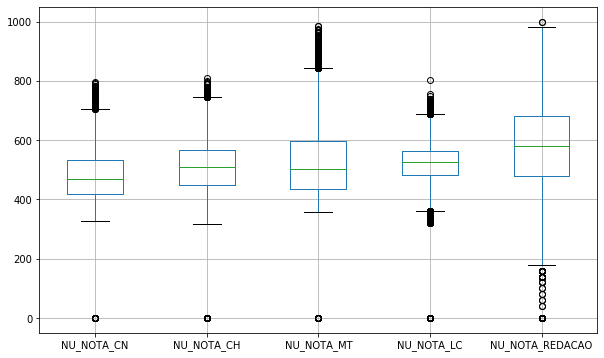

In [16]:
# Boxplot das provas
df[provas].boxplot(grid = True, figsize = (10, 6))

###### Desafio 01 : Proporção dos inscritos por idade

In [17]:
proporcao = df['NU_IDADE'].value_counts(normalize=True).sort_index()*100

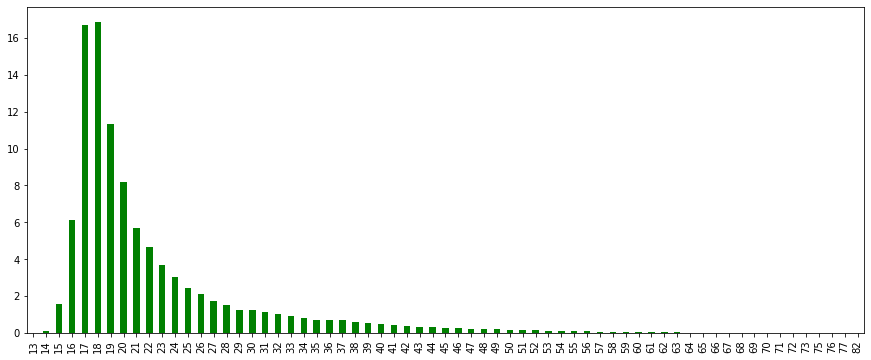

In [18]:
proporcao.plot.bar(y='Proporção', color = 'g', figsize=(15,6))

In [19]:
print(f'Os candidatos com idade de 17, 18 e 19 anos, representam: {proporcao[17]:.2f}%, {proporcao[18]:.2f}% e {proporcao[19]:.2f}%')
print(f'\nEsse grupo representa em conjunto: {proporcao[17]+proporcao[18]+proporcao[19]:.2f}% da amostra')

Os candidatos com idade de 17, 18 e 19 anos, representam: 16.69%, 16.84% e 11.32%

Esse grupo representa em conjunto: 44.85% da amostra


###### Desafio 02: Descobrir de quais estados são os inscritos com 13 anos

In [20]:
anos13 = df.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]
print(f'Os estados que possuem inscritos com 13 anos são: {anos13.values}')

Os estados que possuem inscritos com 13 anos são: ['SP' 'MT' 'AP' 'BA']


###### Desafio 03: Adicionar título aos gráficos

Text(0.5, 1.0, 'Distribuição das notas dos candidatos da amostra')

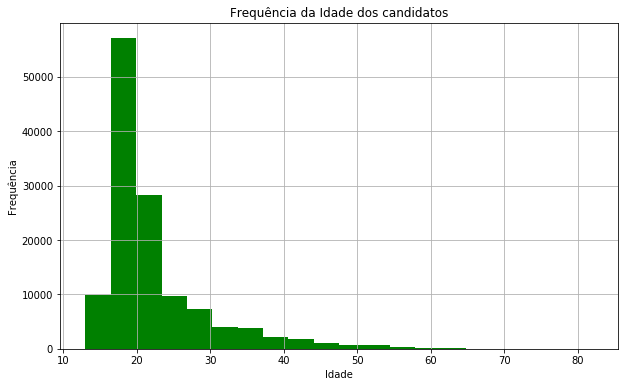

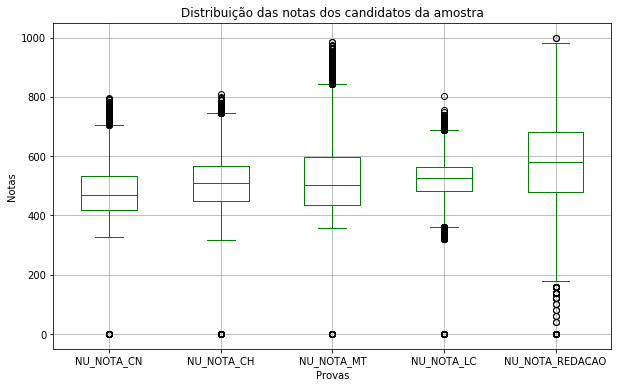

In [21]:
# Gráfico 1
df["NU_IDADE"].hist(bins=20, figsize=(10,6), color = 'g')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Frequência da Idade dos candidatos')

# Gráfico 2 
df[provas].plot.box(grid=True, figsize= (10,6), color = 'g') 
plt.xlabel('Provas')
plt.ylabel('Notas')
plt.title('Distribuição das notas dos candidatos da amostra')

###### Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros.

Text(0, 0.5, 'Treineiros')

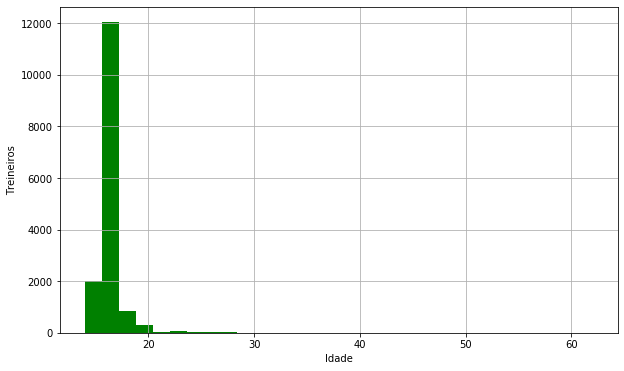

In [22]:
# Treineiros
df_treineiros = df.query("IN_TREINEIRO == 1")["NU_IDADE"]
df_treineiros.hist(bins = 30, figsize=(10,6), color = 'g')
plt.xlabel('Idade')
plt.ylabel('Treineiros')

Text(0, 0.5, 'Não Treineiros')

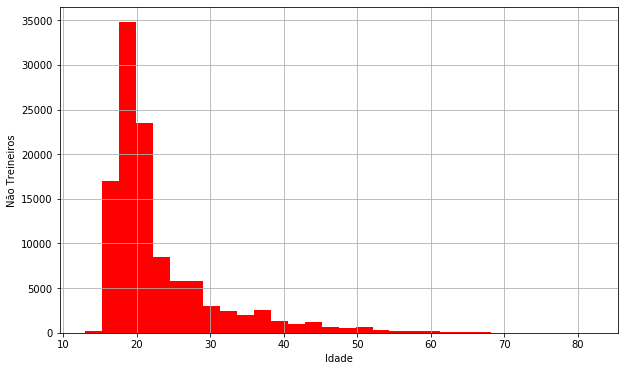

In [23]:
# Não Treineiros
df_nao_treineiros = df.query("IN_TREINEIRO == 0")["NU_IDADE"]
df_nao_treineiros.hist(bins = 30, figsize=(10,6), color = 'r')
plt.xlabel('Idade')
plt.ylabel('Não Treineiros')

###### Desafio 05: Comparar as distribuições das provas em inglês espanhol

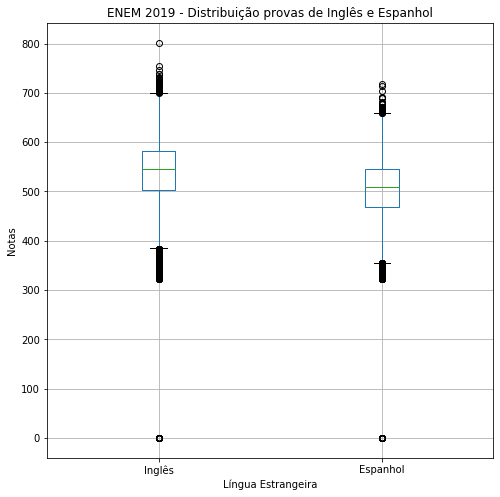

In [24]:
idiomas = {
     'Inglês': df.query("TP_LINGUA == 0")['NU_NOTA_LC'],
     'Espanhol': df.query("TP_LINGUA == 1")['NU_NOTA_LC']
}
df_idiomas = pd.DataFrame.from_dict(idiomas)

df_idiomas.boxplot(grid=True, figsize= (8,8))
plt.title('ENEM 2019 - Distribuição provas de Inglês e Espanhol')
plt.xlabel('Língua Estrangeira')
plt.ylabel('Notas')
plt.show()

###### Desafio 06 - Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações

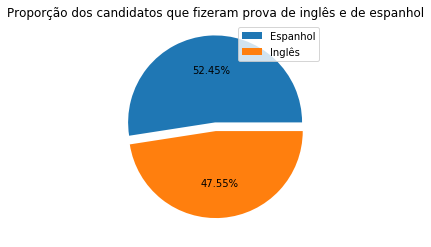

In [43]:
# Proporção dos candidatos que fizeram prova de inglês e de espanhol
plt.pie(df['TP_LINGUA'].value_counts(), autopct='%.2f%%')
plt.legend(['Espanhol', 'Inglês'])
plt.show()

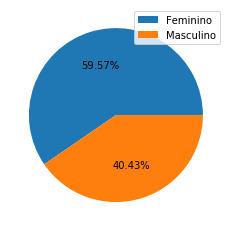

In [51]:
# Proporção dos candidatos em relação ao sexo
plt.pie(df['TP_SEXO'].value_counts(), autopct='%.2f%%')
plt.legend(['Feminino', 'Masculino'])
plt.show()